#Aula 3: Correlações e Exploração de Dados
##Introdução

Nessa aula utilizaremos uma base totalmente nova, que nós também não conhecíamos até o momento da análise. Você vai acompanhar a exploração e, principalmente, as dificuldades ao analisar uma base de dados desconhecida.

Nessa aula iremos trabalhar com a **IMBD 5000**, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados IMBD.

In [0]:
#Vamos começar importando a nossa base de dados! 
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

##Analisando a coluna Color

Uma coluna que chamou à atenção na análise foi a de "color". Vamos conhecer quais valores temos nesta colunas?!

In [0]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

Verificamos que essa coluna "color" informa se o filme é colorido ou é preto e branco. 

Vamos descobrir agora quantos filmes de cada tipo nós temos:

In [0]:
#Com o metodo abaixo descobrimos quantos filmes 'coloridos' e 'preto e branco' temos, também sabemos que há mais de 5000 filmes na base.
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
#Quando passamos o parametro normalize como True, calculamos a participação percentual de cada um dos tipos de filme.
#Ex: 0,96 é o mesmo que dizer 96% dos filmes são coloridos
imdb["color"].value_counts(normalize=True).round(2)

Color               0.96
 Black and White    0.04
Name: color, dtype: float64

##Analisando a coluna Diretores

Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados (lembrando que nossa base é uma amostra muito pequena da realidade).

In [0]:
imdb["director_name"].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
Ricky Gervais        1
Rick Bieber          1
Ronald Neame         1
Gary Sinyor          1
Kaige Chen           1
Name: director_name, Length: 2398, dtype: int64

Concluimos que _Steven Spielberg_ e _Woody Allen_ são os diretores com mais filmes no IMDB 5000.

##Analisando a quantidade de Críticas

Continuando com nossa exploração de algumas informações, vamos olhar para o número de críticas por filmes.

In [0]:
imdb["num_critic_for_reviews"]


0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [0]:
imdb["num_critic_for_reviews"].describe().round(2)

count    4993.00
mean      140.19
std       121.60
min         1.00
25%        50.00
50%       110.00
75%       195.00
max       813.00
Name: num_critic_for_reviews, dtype: float64

Veja que as colunas **color e director_name** são strings, não fazendo sentido olhar para médias, medianas e afins. 

Olhar para o **número de criticas** já pode ser interessante, por isso usamos o .describe(). Agora podemos até plotar um histograma para avaliar o número de review.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


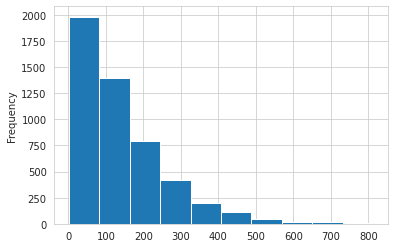

In [0]:
#Pltando um grafico em histograma para número de criticas com biblioteca seaborn
import seaborn as sns
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist')

Verificamos que **poucos filmes tem mais de 500 votos**, como visto o eixo y, por isso um paralelo que podemos fazer é que: 
* Filmes com muitos votos são mais populares. 
* Filmes com poucos votos não são tão populares. 

Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. 

Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

##Analisando a coluna orçamentos e receitas de Filmes

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross:

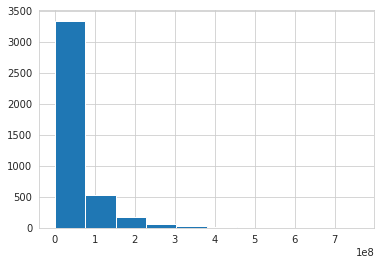

In [0]:
imdb["gross"].hist()

Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo X (receita) temos valores tão altos que a escala teve que ser de centena de milhões. Veja como pouquíssimos filmes tem alto faturamento, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

Vamos tentar conhecer quais são esses filmes com faturamento astronômico.


In [0]:
#Buscando os 10 filmes com maior faturamento
imdb.sort_values("gross", ascending=False)["movie_title"].head(10)

0                                          Avatar 
26                                        Titanic 
29                                 Jurassic World 
794                                  The Avengers 
17                                   The Avengers 
66                                The Dark Knight 
240     Star Wars: Episode I - The Phantom Menace 
3024           Star Wars: Episode IV - A New Hope 
8                         Avengers: Age of Ultron 
3                           The Dark Knight Rises 
Name: movie_title, dtype: object

Nessa lista temos: **Avatar, Titanic, Jurassic World e The Avengers** e sabemos que esses filmes tiveram bilheterias gigantescas. 

Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados: dados que encontramos duas linhas diplicadas. Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações (Se estiver curioso em saber como se faz, consulte o .drop_duplicates()).

Agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: 
* Será que filmes coloridos tem faturamento maior que filmes preto e branco?



##Transformando a coluna color 
Para começar a responder essa pergunta precisamos transformar a coluna Color:

In [0]:
#Solicita as linhas que so tenham dados com "Color" e "BW" na coluna color
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
#Variavel para armazenar como valores de 0 ou 1. 0 para BW e 1 para color
#Tambem adicionamos uma nova coluna ao data frame
color_or_bw["color_0_ou_1"] = (color_or_bw["color"] == "Color") * 1
color_or_bw["color_0_ou_1"].value_counts()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1    4815
0     209
Name: color_0_ou_1, dtype: int64

Agora nós temos uma última coluna em nosso dataframe com valores 0 e 1 (Feito pelo codigo anterior). 

In [0]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


##Plotando o gráfico cor-receita e fazendo média e mediana de dados

Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

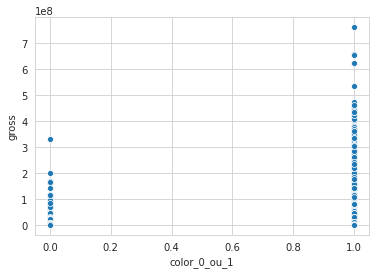

In [0]:
#Plotamos nossos dados com um displot
sns.scatterplot(data = color_or_bw, x = "color_0_ou_1", y = "gross")

Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos **pontos bem altos em filmes preto e branco, chamando muito atenção**.

Vamos explorar algumas estatísticas destes filmes (os pretos e blancos):

In [0]:
#Media da receita
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [0]:
#Media de notas no imdb
color_or_bw.groupby("color").mean()["imdb_score"].round(2)

color
 Black and White    7.23
Color               6.41
Name: imdb_score, dtype: float64

In [0]:
#Mediana das notas no imdb
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes: a média e mediana das notas de filmes preto e branco são maiores. 

Há várias possíveis explicações sobre o porquê disso.

Conclusão: Se somarmos o fato das boas notas dos filmes em preto e branco com a informação do grafico que mostra a receita consideravel desses filmes, chegamos a conclusão de que esses filmes são bastantes valorizados.

##Analisando as Finanças dos Filmes

A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento). Vamos iniciar plotando e interpretando um gráfico de gross (faturamento/receita) por budget (orçamento/despesas).

Para plotar os dados, primeiro **removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0**, para então gerar o gráfico.

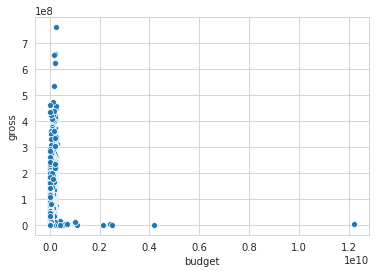

In [0]:
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget > 0 | gross > 0")
sns.scatterplot(data = budget_gross, x = "budget", y = "gross")

Agora vamos analisar esse gráfico juntos, veja que a escala de budget mudou, agora é 10. 

Repare que: apenas poucos filmes tem orçamentos tão grandes assim, e seus faturamentos são muito baixos. Será que temos algum problema nos dados? Vamos investigar melhor!


In [0]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Ordenando os dados pelo budget, para tentar resolver o problema, percebemos que as primeiras posições são de filmes asiáticos.

Países asiaticos costumam usar moedas que possuem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes. 

Como não temos garantia dos números, vamos precisar trabalhar **apenas com filmes americanos**, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

In [0]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [0]:
imdb = imdb.drop_duplicates()
#Selecionando so os filmes americanos
imdb_usa = imdb.query("country == 'USA'")
#Selecionando pelos filmes de maior orçamento
imdb_usa = imdb_usa.sort_values("budget", ascending = False)
imdb_usa.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Agora temos os dados só dos filmes americanos para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:


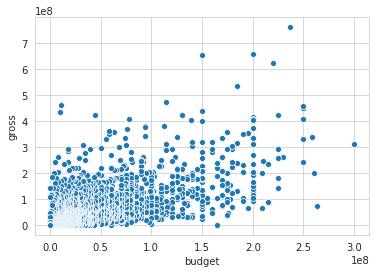

In [0]:
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget", "gross"]].dropna()
sns.scatterplot(data = budget_gross, x = "budget", y = "gross")

Veja que interessante, aparentemente temos uma relação entre orçamento e faturamento: Quanto maior o orçamento, maior o faturamento.



##Analisando o Lucro dos Filmes

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, **o lucro**, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no DataSet é conhecido como **Feature Engineering**.

In [0]:
#Calculamos o lucro, que é igual ao faturamento menos o orçamento
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
imdb_usa['lucro'].head()

1         9404152.0
5      -190641321.0
7       -59192738.0
6        78530303.0
3461     78530303.0
Name: lucro, dtype: float64

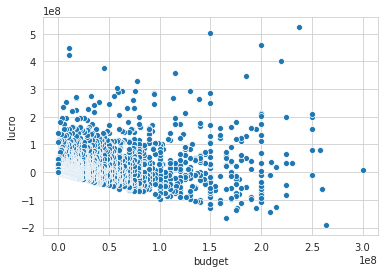

In [0]:
#Construímos nossa coluna lucro na base de dados e plotamos o orçamento contra lucro.
budget_lucro = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro"]].dropna()
sns.scatterplot(data = budget_lucro, x = "budget", y = "lucro")

Repare que temos pontos interessantes nesta visualização: 
* Um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também _podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes)_. 
* Outro ponto interessante de se analisar seriam os filmes com baixos orçamentos e muito lucro, será que estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade?

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o **lucro em relação ao ano de produção**:

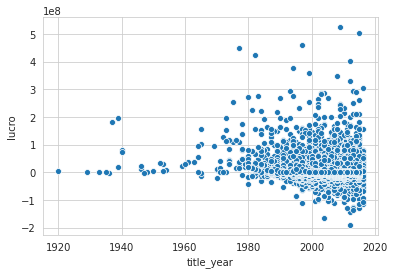

In [0]:
#Construimos nossa coluna lucro em relação ao ano de produção
year_lucro = imdb_usa.query("budget > 0 | gross > 0")[["title_year", "lucro"]].dropna()
sns.scatterplot(x = "title_year", y = "lucro", data = year_lucro)

Veja como alguns pontos mais recentes reforçam a teoria anterior de que _alguns filmes podem ainda não ter recuperado o dinheiro investido_ (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

##Analisando o Orçamento dos Filmes de Alguns Diretores

Sugerimos uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [0]:
#Contando a quantidade de filmes de cada diretor americano
filmes_por_diretor = imdb_usa["director_name"].value_counts()
#Juntando a coluna quantidade de filmes com o orçamento 
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on = "director_name")
#Escrevendo o nome das colunas em portugues
gross_director.columns = ["orçamento", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()


,director_name,orçamento,filmes_irmaos
0,Gore Verbinski,309404152.0,7.0
1,Andrew Stanton,73058679.0,3.0
2,Nathan Greno,200807262.0,1.0
3,Sam Raimi,336530303.0,11.0
4,Sam Raimi,336530303.0,11.0


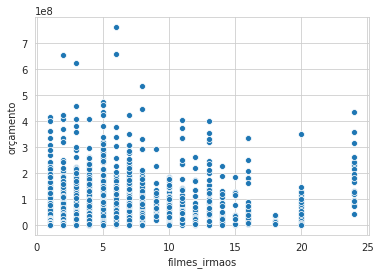

In [0]:
sns.scatterplot(data = gross_director, x = "filmes_irmaos", y = "orçamento")

Essa imagem aparentemente, infelizmente, não é muito conclusiva, então não conseguimos inferir tantas informações. Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, não se preocupe.

#Correlação de Dados

Para finalizar, que tal realizar uma análise das correlações dos dados? 

Existem várias formas de calcular a correlação, esse é um assunto denso. Você pode ler mais sobre essas métricas neste [link](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

Podemos iniciar a análise das correlações plotando o pairplot. O pairplot mostra muita informação e a melhor forma de você entender é assistindo as conclusões que tiramos sobre esses gráficos na vídeoaula.

In [0]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].head()

,gross,budget,lucro,title_year
1,309404152.0,300000000.0,9404152.0,2007.0
5,73058679.0,263700000.0,-190641321.0,2012.0
7,200807262.0,260000000.0,-59192738.0,2010.0
6,336530303.0,258000000.0,78530303.0,2007.0
3461,336530303.0,258000000.0,78530303.0,2007.0


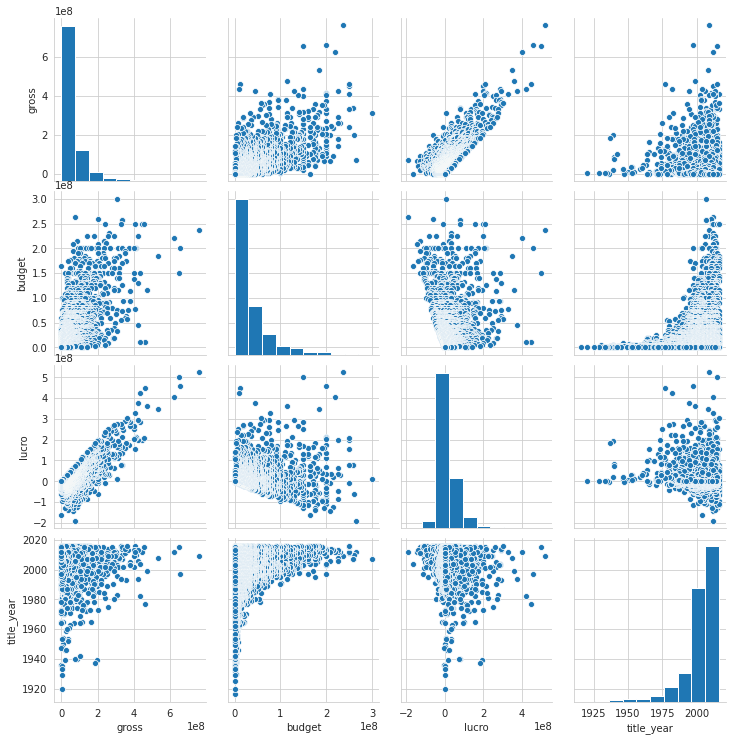

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do .corr() do pandas. 

In [0]:
#Simplificando os graficos em números
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr().round(3)

,gross,budget,lucro,title_year
gross,1.000,0.646,0.797,0.035
budget,0.646,1.000,0.053,0.229
lucro,0.797,0.053,1.000,-0.123
title_year,0.035,0.229,-0.123,1.000


Com o pandas é simples de se calcular a correlação, mas precisamos saber interpretar os resultados:

* A correlação é uma métrica que vai de 1 a -1. 
* Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. 
* Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. 
* Quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra.

Entendido sobre a correlação vamos analisar as nossas: 
* Veja que lucro e faturamento(gross) tem uma correlação alta, o que indica que quanto maior o orçamento maior o lucro (mas repare que a correlação não é perfeita)
* O ano de produção (title_yers) e lucro tem correlação negativa, mas muito perto de zero (ou seja quase não tem correlação). 

Viu como conseguimos analisar muitas coisas com a correlação?! Pense e tente analisar os outros casos também.

P.S: A partir de agora teremos muitos desafios envolvendo mais análises e conclusões, então não haverá um "gabarito". O importante é você compartilhar suas soluções com os colegas e debater os seus resultados e das outras pessoas


## Desafio 1

Plotar e analisar o Boxplot da MEDIA das NOTAS (coluna imbd_score) dos filmes em preto e branco e coloridos.

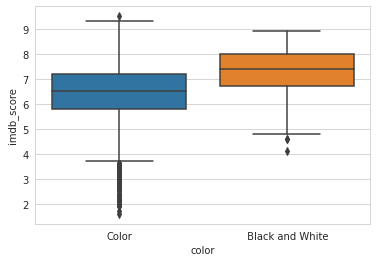

In [0]:
sns.boxplot(data = color_or_bw, x = 'color', y = 'imdb_score')

## Desafio 2

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra qual é esse filme (budget próximo de 2.5).

In [0]:
#Ordenando os filmes do menor para o maior (ascendente) com base no lucro
imdb_usa.sort_values('lucro', ascending=True).head(1)['movie_title']

5    John Carter 
Name: movie_title, dtype: object

##Desafio 3

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [0]:
#Mostrando os filmes mais recentes (na ordem decrescente com base no ano)
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending = False).head(10)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
73,Suicide Squad,-13912817.0,2016.0
3753,Fifty Shades of Black,6675178.0,2016.0
1789,Pride and Prejudice and Zombies,-17092709.0,2016.0
380,Now You See Me 2,-25314641.0,2016.0
3756,The Perfect Match,4658370.0,2016.0
2549,The Young Messiah,-12037424.0,2016.0
1010,Free State of Jones,-29610033.0,2016.0
150,Ghostbusters,-25900341.0,2016.0
2022,Jane Got a Gun,-23487185.0,2016.0
106,Alice Through the Looking Glass,-93153376.0,2016.0


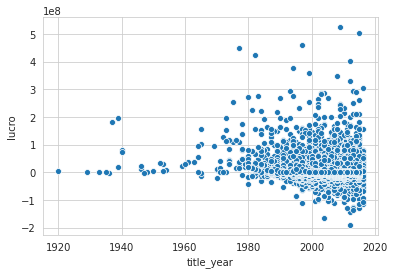

In [0]:
lucro_year = imdb_usa[["title_year", "lucro"]].dropna()
sns.scatterplot(data = lucro_year, x = "title_year", y = "lucro")

##Desafio 4

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [0]:
pre_war = imdb_usa.query('title_year < 1940').sort_values('lucro', ascending  =False).dropna()
pre_war[['movie_title', 'lucro']].head(5)

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0
4157,The Wizard of Oz,19402612.0
4812,The Broadway Melody,2429000.0
4706,Top Hat,2391000.0


##Desafio 5

No gráfico de **filmes_irmaos por orçamento** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen.



In [0]:
gross_director.drop_duplicates('director_name').query('filmes_irmaos == 18')

,director_name,orçamento,filmes_irmaos
1502,Woody Allen,7496522.0,18.0


##Desafio 6

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

In [0]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = "filmes_irmaos", y = "orçamento", data=gross_director)

NameError: ignored

In [0]:
gross_director[(gross_director['filmes_irmaos'] > 17) & (gross_director['filmes_irmaos'] < 19)]

##Desafio 7

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [0]:
filmes_depois_de_2000 = imdb_usa.query('title_year >= 2000')
filmes_depois_de_2000[["gross", "budget", "lucro", "title_year"]].corr()

Em comparação à correlação anterior: 
* Para os filmes de depois de 2000 a correlação entre gross-budget(orçamento-finança) e budget-lucro (finança-lucro) aumentou enquanto entre gross-lucro (finança-lucro) diminuiu, todos com pequenas margens de diferenças.
* Olhando para budget-lucro (finança-lucro), foi um aumento pequeno no valor da correlação desses filmes do imdb, mas que condiz com o esperado de que o budget é cada vez maior com o tempo assim como o lucro, os dois crescendo de forma bem semelhante.



##Desafio 8

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

In [0]:
sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')

##Desafio 9

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [0]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

In [0]:
votos_por_ano = imdb_usa.groupby('title_year')['num_voted_users'].mean()
imdb_usa_votos_por_ano = imdb_usa.join(votos_por_ano, on='title_year', rsuffix='rs')
imdb_usa_votos_por_ano.rename(columns={'num_voted_usersrs': 'votos_por_ano'}, inplace=True)
imdb_usa_votos_por_ano.head()

In [0]:
imdb_usa_votos_por_ano[['title_year', 'votos_por_ano']].corr()

In [0]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_year', y='votos_por_ano', data=imdb_usa_votos_por_ano)